In [285]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#multiple linear regression
from sklearn import linear_model

#for penalized linear model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#default fig size
plt.rcParams['figure.figsize'] = [5, 10]






In [286]:
#load data
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")


In [287]:
#check for na values
train_data_isna = train_data.isna().sum()/len(train_data)*100
train_data_isna[train_data_isna>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Based on this, I will not use PoolQC, MiscFeature, Alley,Fence,FireplaceQua,LotFrontage.

In [288]:
train_corr = train_data.corr()
train_corr[abs(train_corr)>0.7]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Found the following correlations greater that +/- 0.7:
<br>GarageYrBlt v YearBlt = 0.825
<br>SalePrice v OverallQual=0.790982
<br>SalePrice v GrLivArea = 0.709

<p>Makes sense that year built and garage year built are correlated. Therefore, I will not use garage year built.</p>


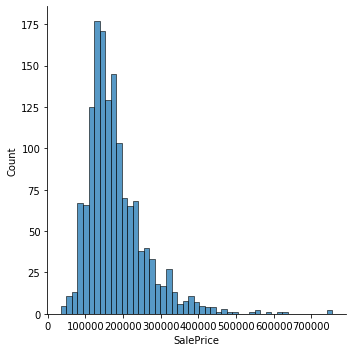

In [289]:
#Plot the histogram of SalePrice
sns.displot(train_data, x ='SalePrice')

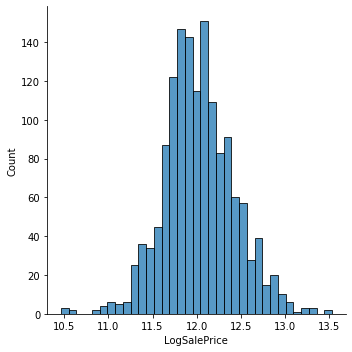

In [290]:
train_data['LogSalePrice']=[math.log(x)for x in train_data['SalePrice']]
sns.displot(train_data, x ='LogSalePrice')

In [291]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True,axis=1)


In [292]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [293]:
train_dummified = pd.get_dummies(train_data, drop_first=True)
train_dummified

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [294]:
for col in train_data:
    print(col)
    print(train_data[col].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]

Based on this, the columns I would like to one-hot encode are listed in nominal_cols variable.

In [295]:
nominal_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle','RoofStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
train_data_nominal_dummies = pd.get_dummies(train_data[nominal_cols],drop_first=True)
train_data.drop(nominal_cols,inplace=True,axis=1)
train_data = train_data.join(train_data_nominal_dummies)
train_data.dropna(inplace=True)

In [296]:
train_data_x = train_data.drop(['LogSalePrice','SalePrice'], axis=1)
train_data_y = train_data['LogSalePrice']

# OLS Fitting

Kaggle provides train and test data. However, their test data doesn't have sale price. So I will be doing a train/test split on just the train data.

In [297]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.2)


In [298]:
linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

#Predictions
train_predict = ols.predict(X_train)
test_predict = ols.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test


In [299]:
print("train score:",ols.score(X_train, y_train))
print("train RSS:",np.sum(train_res)**2)
print("test score:",ols.score(X_test, y_test))
print("test RSS:",np.sum(test_res)**2)

train score: 0.9446260512881367
train RSS: 9.47670911672123e-24
test score: 0.7284985828182275
test RSS: 14.873216829871305


train std: 0.08998048810595222
train mean: 2.8087832141246662e-15


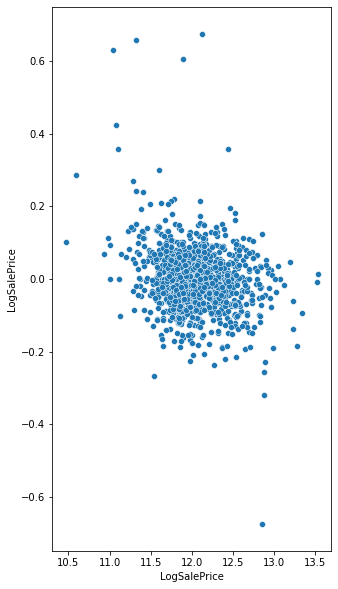

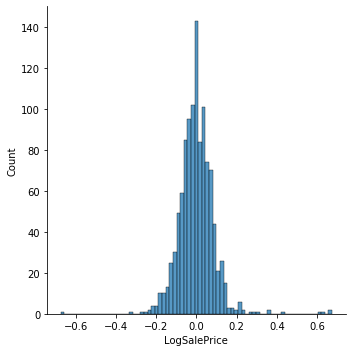

In [300]:
sns.scatterplot(x=y_train, y = train_res)
sns.displot(train_res)
print("train std:",train_res.std())
print("train mean:",train_res.mean())


test std: 0.19292940893942154
test mean: -0.014023930824376356


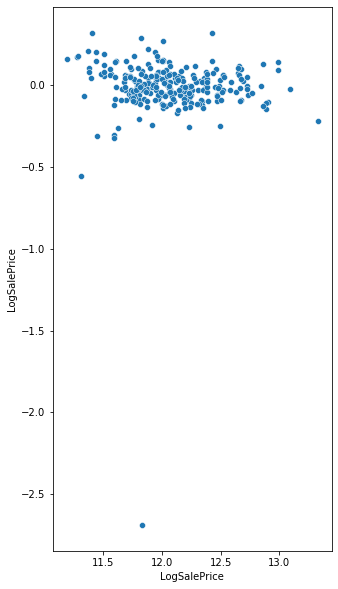

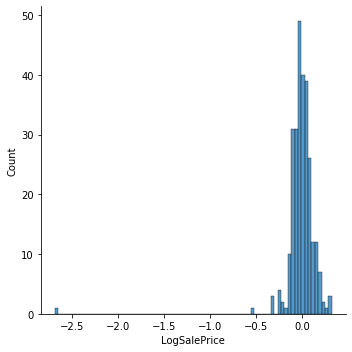

In [301]:
#test case stats
sns.scatterplot(x=y_test, y = test_res)
sns.displot(test_res)

print("test std:",test_res.std())
print("test mean:",test_res.mean())


test res tight std: 0.10517826253736295
N outliers: 1


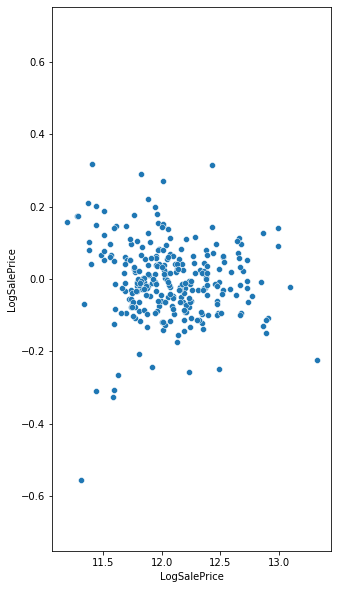

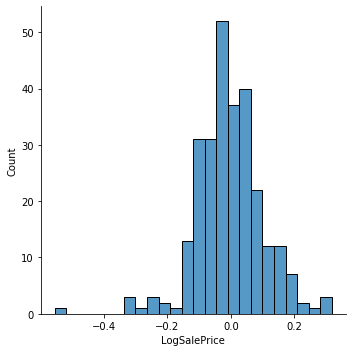

In [302]:
#test case plots with tighter axis
test_res_tight = test_res[abs(test_res)<1]
plt.ylim(-0.75,0.75)
sns.scatterplot(x=y_test, y = test_res)
sns.displot(test_res_tight)
print("test res tight std:",test_res_tight.std())
print("N outliers:",len(test_res[abs(test_res)>1]))


In [303]:
test_res[abs(test_res)>1]

1275   -2.688459
Name: LogSalePrice, dtype: float64

Train score is significantly higher than test score. The error is the test is driven by a few outliers. These are all signs of over-fitting.

In [304]:
len(ols.coef_)

237

In [305]:
len(X_train.columns)

237

In [306]:
ols.intercept_

11.74040460701617

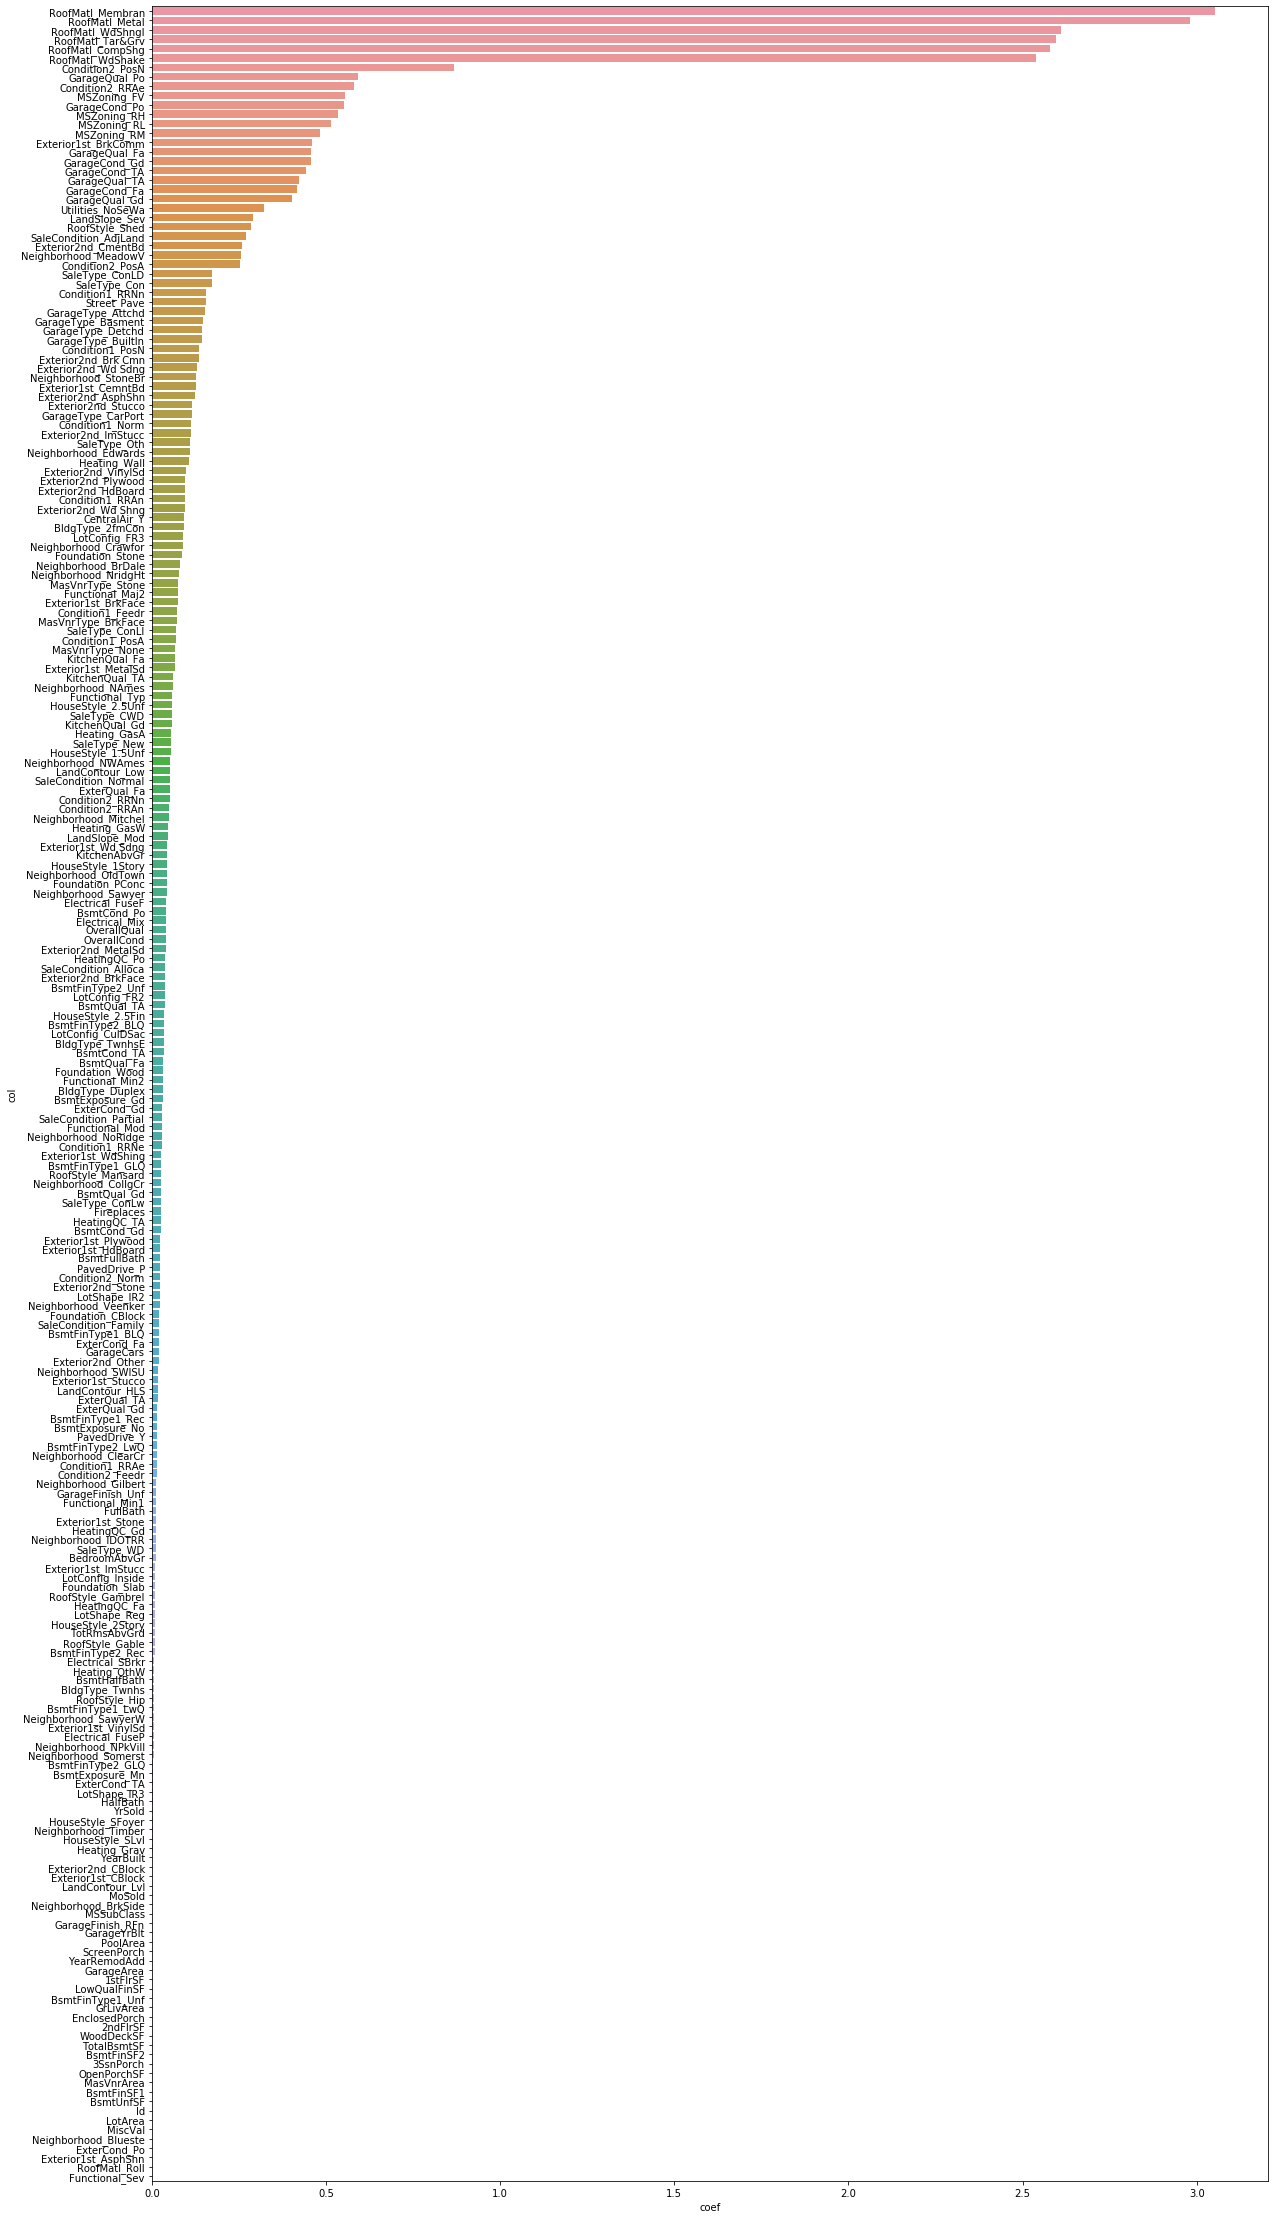

In [307]:
ols_coefs = pd.DataFrame({'col':X_train.columns,'coef':abs(ols.coef_)}).sort_values(by='coef',ascending=False)
ols_coefs
plt.rcParams['figure.figsize'] = [20, 40]
sns.barplot(x=ols_coefs['coef'],y=ols_coefs['col'])

Dominant features are roof material, MS Zoning, garage qual.

# Penalized Linear Regression

In [308]:
#Use elastic net, which is a mix of ridge and lasso

#just guess alpha and l1_ratio
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
enet.fit(X_train, y_train)

#Predictions
train_predict = enet.predict(X_train)
test_predict = enet.predict(X_test)

#residuals
train_res = train_predict - y_train
test_res = test_predict - y_test

#score is Rsquared
print("train score:",enet.score(X_train, y_train))
print("train RSS:",np.sum(train_res)**2)
print("test score:",enet.score(X_test, y_test))
print("test RSS:",np.sum(test_res)**2)



train score: 0.7984004054635915
train RSS: 1.672334631970611e-24
test score: 0.8568933561608376
test RSS: 4.104779450867881


Now try to interate through the different alpha and rho.

In [338]:
N_alpha = 100
N_rho   = 10
params_df = pd.DataFrame(columns=['alpha','rho','score'])

alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            enet.set_params(alpha=alpha, l1_ratio=rho)
            enet.fit(X_train, y_train)
            score = enet.score(X_train,y_train) 
            df2 = pd.DataFrame(data=[[alpha,rho,score]] ,columns=['alpha','rho','score'])
            params_df = params_df.append(df2)

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432844366378899, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432843998550299, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.43284363072409, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432840372593707, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432847505547891, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432846655799274, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4328382796274255, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432854757238233, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432852794117695, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432836853616694, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432833425307724, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.43287150852846, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432830172541003, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432822251519323, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432910200541713, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432814739605605, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4327964643225, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432999534680307, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective d

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4328222102584185, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4327802479041996, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432738335388045, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objecti

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432796546671606, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432701003540639, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432605867396044, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432754713091993, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432539689805748, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4323261520638875, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4329465350962645, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432350088393652, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.431843858118024, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objectiv

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432964162885399, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432066389583383, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.431197003812277, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.435538003663406, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.430524929162914, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.42952569908059, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.451235116810667, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.449144002461922, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.447419263502724, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.408200741480535, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.448941529488205, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.451405672530947, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.385282508612175, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.379594804077826, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.319569676934266, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48029871469677854, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04701937588975014, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0823248857927945, tolerance: 0.016010515465850528
  positive)
/Users/enzomangubat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Obje

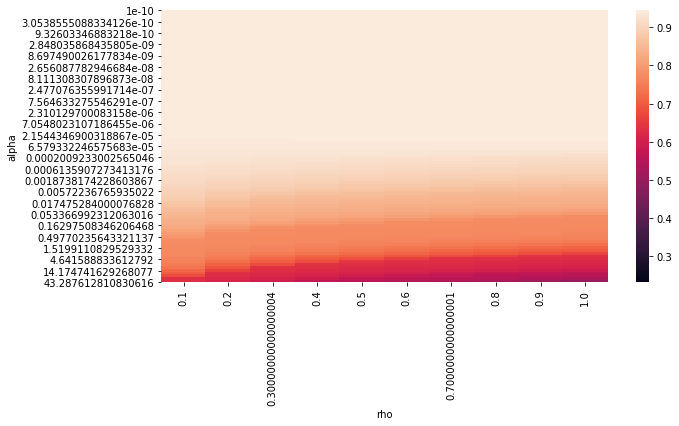

In [341]:
heatmap_data = params_df.pivot(index='alpha',columns='rho',values='score')

plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(heatmap_data)

In [335]:
params_df.append(df2)

,alpha,rho,score
0,100.0,1.0,0.231998


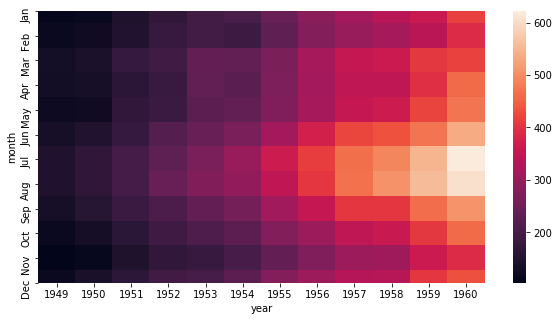

In [323]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

,alpha,rho,score
0,1,1,1
